In [1]:
import pandas as pd
import numpy as np
import os
import json 
import sys
from typing import Dict, Tuple, Any, Optional, List
sys.path.append('..')
import time
from src.utils import load_data

c:\Users\1\anaconda3\envs\rag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
sys.path.append(r'C:\Users\1\Documents\GitHub\rageval')
from rageval.models import OpenAILLM

In [2]:
# dataset with human annotations
df_asqa = load_data('../data/asqa/asqa_with_human_343.json')
df_wikieval = load_data('../data/wikieval/all.json')
df_antique = load_data('../data/antique/all.json')

## 1. preprocess

In [3]:
with open('../human.json', 'r') as f:
    data = []
    for line in f:
        data.append(json.loads(line))

In [8]:
with open('../stablity/3_llm_evaluators.json', 'r') as f:
    data = json.load(f)

In [12]:
df_3 = pd.DataFrame(data)

In [13]:
print(df_3.columns, df_3.model.unique())

Index(['ambiguous_question', 'qa_pairs', 'wikipages', 'annotations',
       'sample_id', 'response', 'answer', 'long_answers', 'short_answers',
       'long_answer_length', 'short_answer_length', 'model', 'scores_gpt-4o',
       'scores_gemini-2.0-flash-exp', 'scores_claude-3-5-sonnet-20241022'],
      dtype='object') ['glm-4' 'llama2-13b-chat' 'gpt_3.5_turbo_instruct' 'mistral_7b'
 'llama2_7b_chat' 'llama3_8b_instruct' 'solar_10.7b_instruct' 'gpt-4o'
 'claude-3-5-sonnet-20241022' 'gemini-2.0-flash-exp']


In [6]:
df = pd.DataFrame(data)

In [14]:
df.model.unique()

array(['glm-4', 'llama2-13b-chat', 'gpt_3.5_turbo_instruct', 'mistral_7b',
       'llama2_7b_chat', 'llama3_8b_instruct', 'solar_10.7b_instruct'],
      dtype=object)

In [15]:
# Get unique values from df to create an initial filter
questions_in_df = df[['ambiguous_question', 'model']].copy()

# Filter df_3 to get only rows where ambiguous_question and model match df 
filtered_df = df_3[df_3['ambiguous_question'].isin(questions_in_df['ambiguous_question']) & 
                   df_3['model'].isin(questions_in_df['model'])]

In [25]:
filtered_df.sort_values(by=['ambiguous_question','model'], inplace=True)

C:\Users\1\AppData\Local\Temp\ipykernel_51988\1488600501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by=['ambiguous_question','model'], inplace=True)


In [52]:
filtered_df.head()

,ambiguous_question,qa_pairs,wikipages,annotations,sample_id,response,answer,long_answers,short_answers,long_answer_length,short_answer_length,model,scores_gpt-4o,scores_gemini-2.0-flash-exp,scores_claude-3-5-sonnet-20241022
121,Beatles do you want to know a secret singer?,"[{'context': '""Do You Want to Know a Secret"" i...","[{'title': 'Do You Want to Know a Secret', 'ur...","[{'knowledge': [{'content': '""Do You Want to K...",-3611913378590168865,\nThis question is ambiguous due to the lack o...,1. Interpretation: What is the name of the sin...,"[""Do You Want to Know a Secret"" is a song by E...","[[George Harrison, Harrison], [John Lennon, Jo...",203,2,glm-4,3,10,6
1121,Beatles do you want to know a secret singer?,"[{'context': '""Do You Want to Know a Secret"" i...","[{'title': 'Do You Want to Know a Secret', 'ur...","[{'knowledge': [{'content': '""Do You Want to K...",-3611913378590168865,This question is ambiguous in terms of which s...,This question is ambiguous in terms of which s...,"[""Do You Want to Know a Secret"" is a song by E...","[[George Harrison, Harrison], [John Lennon, Jo...",203,2,gpt_3.5_turbo_instruct,3,8,6
621,Beatles do you want to know a secret singer?,"[{'context': '""Do You Want to Know a Secret"" i...","[{'title': 'Do You Want to Know a Secret', 'ur...","[{'knowledge': [{'content': '""Do You Want to K...",-3611913378590168865,This question is ambiguous in terms of which s...,John Lennon sang the song Do You Want to Know ...,"[""Do You Want to Know a Secret"" is a song by E...","[[George Harrison, Harrison], [John Lennon, Jo...",203,2,llama2-13b-chat,2,7,3
2121,Beatles do you want to know a secret singer?,"[{'context': '""Do You Want to Know a Secret"" i...","[{'title': 'Do You Want to Know a Secret', 'ur...","[{'knowledge': [{'content': '""Do You Want to K...",-3611913378590169088,This question is ambiguous in terms of which s...,The singer of the Beatles song “Do You Want to...,"[""Do You Want to Know a Secret"" is a song by E...","[[George Harrison, Harrison], [John Lennon, Jo...",203,2,llama2_7b_chat,3,2,3
2621,Beatles do you want to know a secret singer?,"[{'context': '""Do You Want to Know a Secret"" i...","[{'title': 'Do You Want to Know a Secret', 'ur...","[{'knowledge': [{'content': '""Do You Want to K...",-3611913378590168865,This question is ambiguous in terms of which s...,"The singer of the song ""Do You Want to Know a ...","[""Do You Want to Know a Secret"" is a song by E...","[[George Harrison, Harrison], [John Lennon, Jo...",203,2,llama3_8b_instruct,6,9,6


In [27]:
df.sort_values(by=['ambiguous_question','model'], inplace=True)

In [33]:
all(filtered_df['response'].values == df['responses'].values)

True

In [40]:
df.rename(columns={'responses':'response', 
                   'answer_rouge_correctness': 'Rouge L', 
                   'answer_exact_match':'Exact Match', 
                   'answer_disambig_f1': 'Disambig F1',
                   'answer_bert_score': 'BERT Score',
                   'answer_relevance_score': 'Answer Relevance',
                   'gpt4_accuracy': 'GPT-4o Accuracy', 
                   'gpt4_informativeness': 'GPT-4o Informativeness',
                   'human_accuracy': 'Human Accuracy', 
                   'human_informativeness': 'Human Informativeness',
                   }, inplace=True)

In [42]:
name_map = {"claude-3-5-sonnet-20241022":"claude-3.5",
            "gemini-2.0-flash-exp":"gemini-2.0",
            "gpt-4o":"gpt-4o",
            "glm-4":"glm4-9b",
            "solar_10.7b_instruct":"solar-10.7b",
            "gpt_3.5_turbo_instruct":"gpt-3.5-turbo",
            "llama3_8b_instruct":"llama3-8b",
            "llama2-13b-chat":"llama2-13b",
            "llama2_7b_chat":"llama2-7b",
            "mistral_7b":"mistral-7b"}

In [43]:
df['model'] = df['model'].apply(lambda x: name_map[x] if x in name_map else x)

In [41]:
df.columns

Index(['ambiguous_question', 'qa_pairs', 'wikipages', 'annotations',
       'sample_id', 'response', 'answers', 'answer_length', 'long_answers',
       'short_answers', 'long_answer_length', 'short_answer_length',
       'response_length', 'answer_relevance_prompt',
       'answers_relevance_completion', 'answers_relevance_res',
       'response_with_ref_prompt', 'response_with_ref_completion',
       'response_with_ref_score', 'Rouge L', 'Exact Match', 'Disambig F1',
       'BERT Score', 'GPT-4o Accuracy', 'GPT-4o Informativeness',
       'Answer Relevance', 'Human Accuracy', 'Human Informativeness', 'model'],
      dtype='object')

In [45]:
df['GPT-4o Fine-grained'] = df['GPT-4o Accuracy'] + df['GPT-4o Informativeness']
df['Human'] = df['Human Accuracy'] + df['Human Informativeness']

In [47]:
filtered_df.columns

Index(['ambiguous_question', 'qa_pairs', 'wikipages', 'annotations',
       'sample_id', 'response', 'answer', 'long_answers', 'short_answers',
       'long_answer_length', 'short_answer_length', 'model', 'scores_gpt-4o',
       'scores_gemini-2.0-flash-exp', 'scores_claude-3-5-sonnet-20241022'],
      dtype='object')

In [48]:
df['Claude-3.5'] = filtered_df['scores_claude-3-5-sonnet-20241022'].values
df['Gemini-2.0'] = filtered_df['scores_gemini-2.0-flash-exp'].values
df['GPT-4o'] = filtered_df['scores_gpt-4o'].values

In [51]:
df.to_json('asqa_with_human_343.json', orient='records', lines=True)

In [49]:
df.columns

Index(['ambiguous_question', 'qa_pairs', 'wikipages', 'annotations',
       'sample_id', 'response', 'answers', 'answer_length', 'long_answers',
       'short_answers', 'long_answer_length', 'short_answer_length',
       'response_length', 'answer_relevance_prompt',
       'answers_relevance_completion', 'answers_relevance_res',
       'response_with_ref_prompt', 'response_with_ref_completion',
       'response_with_ref_score', 'Rouge L', 'Exact Match', 'Disambig F1',
       'BERT Score', 'GPT-4o Accuracy', 'GPT-4o Informativeness',
       'Answer Relevance', 'Human Accuracy', 'Human Informativeness', 'model',
       'GPT-4o Fine-grained', 'Human', 'Claude-3.5', 'Gemini-2.0', 'GPT-4o'],
      dtype='object')

## re eval

In [13]:
from src.utils import load_data
df = load_data('../data/asqa/asqa_with_human_343.json')

Generating train split: 343 examples [00:00, 6742.56 examples/s]


In [16]:
from src.prompts import QA, SYSTEM_INSTRUCTION

def gen_prompt(question, answer, ref=None, system_instruction=SYSTEM_INSTRUCTION, user_instruction=QA):
    if ref is not None:
        return [
            {"role": "system", "content": system_instruction.strip()},
            {"role": "user", "content": user_instruction.format(question=question, answer=answer, answer_ref=ref)}
        ]
    else:
        return [
            {"role": "system", "content": system_instruction.strip()},
            {"role": "user", "content": user_instruction.format(question=question, answer=answer)}
        ]
        
prompts = [gen_prompt(df['ambiguous_question'][i], df['answers'][i], df['long_answers'][i]) for i in range(len(df))]

In [ ]:
from src.models import evaluate, get_score_and_re_eval, results_to_dict
models = ['gpt-4o', 'claude-3-5-sonnet-20241022', 'gemini-2.0-flash-exp']

import time
for model in models:
    if model != 'gpt-4o':
        continue
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    llm_evaluator = OpenAILLM(model=model, 
                              _api_key_env_var="API_KEY",
                              base_url=os.getenv("BASE_URL"),)

    results, texts = evaluate(llm_evaluator, prompts, cache_path=None, max_workers=16)
    scores, texts, results = get_score_and_re_eval(llm_evaluator, results, prompts, texts)
    
    with open(f"../data/run/{model}_{timestamp}.json", "a+") as f:
         f.write(json.dumps([results_to_dict(r) for r in results]))
    
    if model == 'gpt-4o':
        df[f'GPT-4o'] = scores
    if model == 'claude-3-5-sonnet-20241022':
        df[f'Claude-3.5'] = scores
    elif model == 'gemini-2.0-flash-exp':
        df[f'Gemini-2.0'] = scores

In [41]:
df.to_json('asqa_with_human_343.json', orient='records', lines=True)

## 2. consistency

In [5]:
df = load_data('../data/wikieval/350_human.json')

Generating train split: 350 examples [00:00, 12201.76 examples/s]


In [9]:
df_antique = load_data('../data/antique/all.json')

Generating train split: 1386 examples [00:00, 116857.41 examples/s]


In [6]:
df.columns

Index(['id', 'answer', 'context', 'question', 'model', 'gt_answer', 'dataset',
       'gpt', 'claude', 'gemini', 'Human Accuracy', 'Human Informativeness',
       'Human', 'Rouge L', 'Bert Score'],
      dtype='object')

In [7]:
import numpy as np
from scipy.stats import spearmanr, kendalltau

def calculate_correlation(x, y, corr='r'):
    if corr == 'r':
        corr, _ = spearmanr(x, y)
    else:
        corr, _ = kendalltau(x, y)

    return corr*100

def generate_relation_sequence(seq):
    # 生成序列的偏序关系列表
    n = len(seq)
    relation_seq = []
    for i in range(n):
        for j in range(i + 1, n):
            if seq[i] > seq[j]:
                relation_seq.append(1)
            elif seq[i] == seq[j]:
                relation_seq.append(0)
            else:
                relation_seq.append(-1)
    return np.array(relation_seq)

def calculate_agreement(x, y, with_tie=True):
    #计算两个序列中每两个元素偏序关系的一致性
    assert len(x) == len(y)
    assert len(x) > 0
    X = generate_relation_sequence(x)
    Y = generate_relation_sequence(y)
    if not with_tie:
        # 不包括平局的情况
        idx = np.where(X != 0)
        X = X[idx]
        Y = Y[idx]
    
    consistency_count = sum(1 for a, b in zip(X, Y) if a == b)/len(X)
    
    return consistency_count

def cal_winrates(matrix, with_tie=True):
    # 计算矩阵中每两列(model i 与model j)之间的胜率和model i的平均胜率
    # matrix.shape = (m,n) # queries*models
    n = matrix.shape[1]
    winrates = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            if with_tie:
                # m个问题中，每个model_i>model_j的得1分+平局得0.5分    
                winrates[i,j] = (sum(matrix[:,i] > matrix[:, j])+sum(matrix[:,i] == matrix[:, j])/2) / (matrix.shape[0]) 
                # print(i,j,sum(matrix[:,i] > matrix[:, j]), sum(matrix[:,i] == matrix[:, j])/2, winrates[i,j])
            else:    
                winrates[i,j] = sum(matrix[:,i] > matrix[:, j]) / (matrix.shape[0])
            winrates[j,i] = 1 - winrates[i,j]
    return winrates, np.sum(winrates,axis=1)/(winrates.shape[0]-1)

In [8]:
def best_score(x):
    return '\\textbf{'+str(x)+'}'

def second_best_score(x):
    return '\\underline{'+str(x)+'}'

def list_to_latex(lst):
    lst = [round(x,1) for x in lst]
    sorted_lst = sorted(lst, reverse=True)
    lst = [best_score(x) if x == sorted_lst[0] else second_best_score(x) if x == sorted_lst[1] else str(x) for x in lst]
    return lst

In [83]:
df.columns  

Index(['ambiguous_question', 'qa_pairs', 'wikipages', 'annotations',
       'sample_id', 'response', 'answers', 'answer_length', 'long_answers',
       'short_answers', 'long_answer_length', 'short_answer_length',
       'response_length', 'answer_relevance_prompt',
       'answers_relevance_completion', 'answers_relevance_res',
       'response_with_ref_prompt', 'response_with_ref_completion',
       'response_with_ref_score', 'Rouge L', 'Exact Match', 'Disambig F1',
       'BERT Score', 'GPT-4o Accuracy', 'GPT-4o Informativeness',
       'Answer Relevance', 'Human Accuracy', 'Human Informativeness', 'model',
       'GPT-4o Fine-grained', 'Human', 'Claude-3.5', 'Gemini-2.0', 'GPT-4o'],
      dtype='object')

In [77]:
def print_corr(df, models, metrics = ['Rouge L', 'Exact Match', 'Disambig F1', 'BERT Score', 'Answer Relevance', 'GPT-4o Fine-grained', 'GPT-4o', 'Claude-3.5', 'Gemini-2.0' ]):
    for model in models:
        line = []  
        line.append(model)
        m = df.query(f'model == "{model}"')
        spearmans = []
        kendalls = []
        for metric in metrics:
            spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
            kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
        spearmans = list_to_latex(spearmans)
        kendalls = list_to_latex(kendalls)
        line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
        print(' & '.join(line), '\\\\')
    
    line = [] 
    line.append('Average')
    m = df
    spearmans = []
    kendalls = []
    for metric in metrics:
        spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
        kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
    spearmans = list_to_latex(spearmans)
    kendalls = list_to_latex(kendalls)
    line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
    print('\\midrule')
    print(' & '.join(line), '\\\\')


def print_corr_antique_wikieval(df_antique, df_wikieval, antique_models, wikieval_models, metrics1, metrics2):
    for model1, model2 in zip(antique_models, wikieval_models):
        line = []  
        line.append(model2)
        
        m = df_antique.query(f'model == "{model1}"')
        spearmans = []
        kendalls = []
        for metric in metrics1:
            spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
            kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
        spearmans = list_to_latex(spearmans)
        kendalls = list_to_latex(kendalls)
        line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
        
        m = df_wikieval.query(f'model == "{model2}"')
        spearmans = []
        kendalls = []
        for metric in metrics2:
            spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
            kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
        spearmans = list_to_latex(spearmans)
        kendalls = list_to_latex(kendalls)
        line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
        
        print(' & '.join(line), '\\\\')
    
    line = [] 
    line.append('Average')
    m = df_antique
    spearmans = []
    kendalls = []
    for metric in metrics1:
        spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
        kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
    spearmans = list_to_latex(spearmans)
    kendalls = list_to_latex(kendalls)
    line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
    
    m = df_wikieval
    spearmans = []
    kendalls = []
    for metric in metrics2:
        spearmans.append(calculate_correlation(m[metric], m['Human'], corr='r'))
        kendalls.append(calculate_correlation(m[metric], m['Human'], corr='tau'))
    spearmans = list_to_latex(spearmans)
    kendalls = list_to_latex(kendalls)
    line.extend([s+'/'+k for s,k in zip(spearmans, kendalls)])
    
    print('\\midrule')
    print(' & '.join(line), '\\\\')

In [78]:
print_corr_antique_wikieval(df_antique, df_wikieval=df, 
                            antique_models=['glm-4', 'gpt_3.5_turbo_instruct', 'llama2-13b-chat',  'llama2_7b_chat', 'llama3_8b_instruct', 'mistral_7b', 'solar_10.7b_instruct'],  
                            wikieval_models=df.model.unique(),
                            metrics1=['Rouge-L', 'BERT Score', 'Answer Relevance Score', 'GPT-4 Score', 'GPT-4o Fine-grained',], 
                            metrics2=['Rouge L', 'BERT Score', 'GPT-4o', 'GPT-4o Fine-grained'])

glm4-9b & -14.4/-11.4 & -9.8/-7.7 & 0.5/0.4 & \underline{36.7}/\underline{33.1} & \textbf{54.6}/\textbf{51.7} & \underline{44.4}/34.4 & \textbf{44.6}/34.4 & 38.1/\underline{34.8} & 39.1/\textbf{35.7} \\
gpt-3.5-turbo & 2.8/2.0 & -9.1/-7.0 & 43.7/35.0 & \underline{53.2}/\underline{47.1} & \textbf{56.5}/\textbf{51.7} & \textbf{57.1}/\textbf{45.1} & \underline{56.8}/\underline{43.1} & 41.9/36.5 & 46.9/42.1 \\
llama2-13b & 11.0/7.8 & 0.5/0.5 & 10.9/7.6 & \underline{74.9}/\underline{62.5} & \textbf{81.5}/\textbf{71.2} & \underline{61.4}/\underline{47.2} & 57.1/44.3 & \textbf{61.8}/\textbf{51.7} & 55.4/46.8 \\
llama2-7b & 13.8/10.0 & 9.3/6.9 & 17.7/13.4 & \underline{69.3}/\underline{58.6} & \textbf{74.6}/\textbf{64.7} & \underline{74.6}/\textbf{60.4} & \textbf{75.2}/\underline{60.3} & 60.8/52.8 & 60.1/52.9 \\
llama3-8b & 2.4/1.5 & 8.7/6.3 & 2.5/1.6 & \underline{65.6}/\underline{54.6} & \textbf{72.2}/\textbf{63.1} & \textbf{51.7}/\textbf{40.6} & \underline{44.9}/34.5 & 44.1/\underline{37.7} &

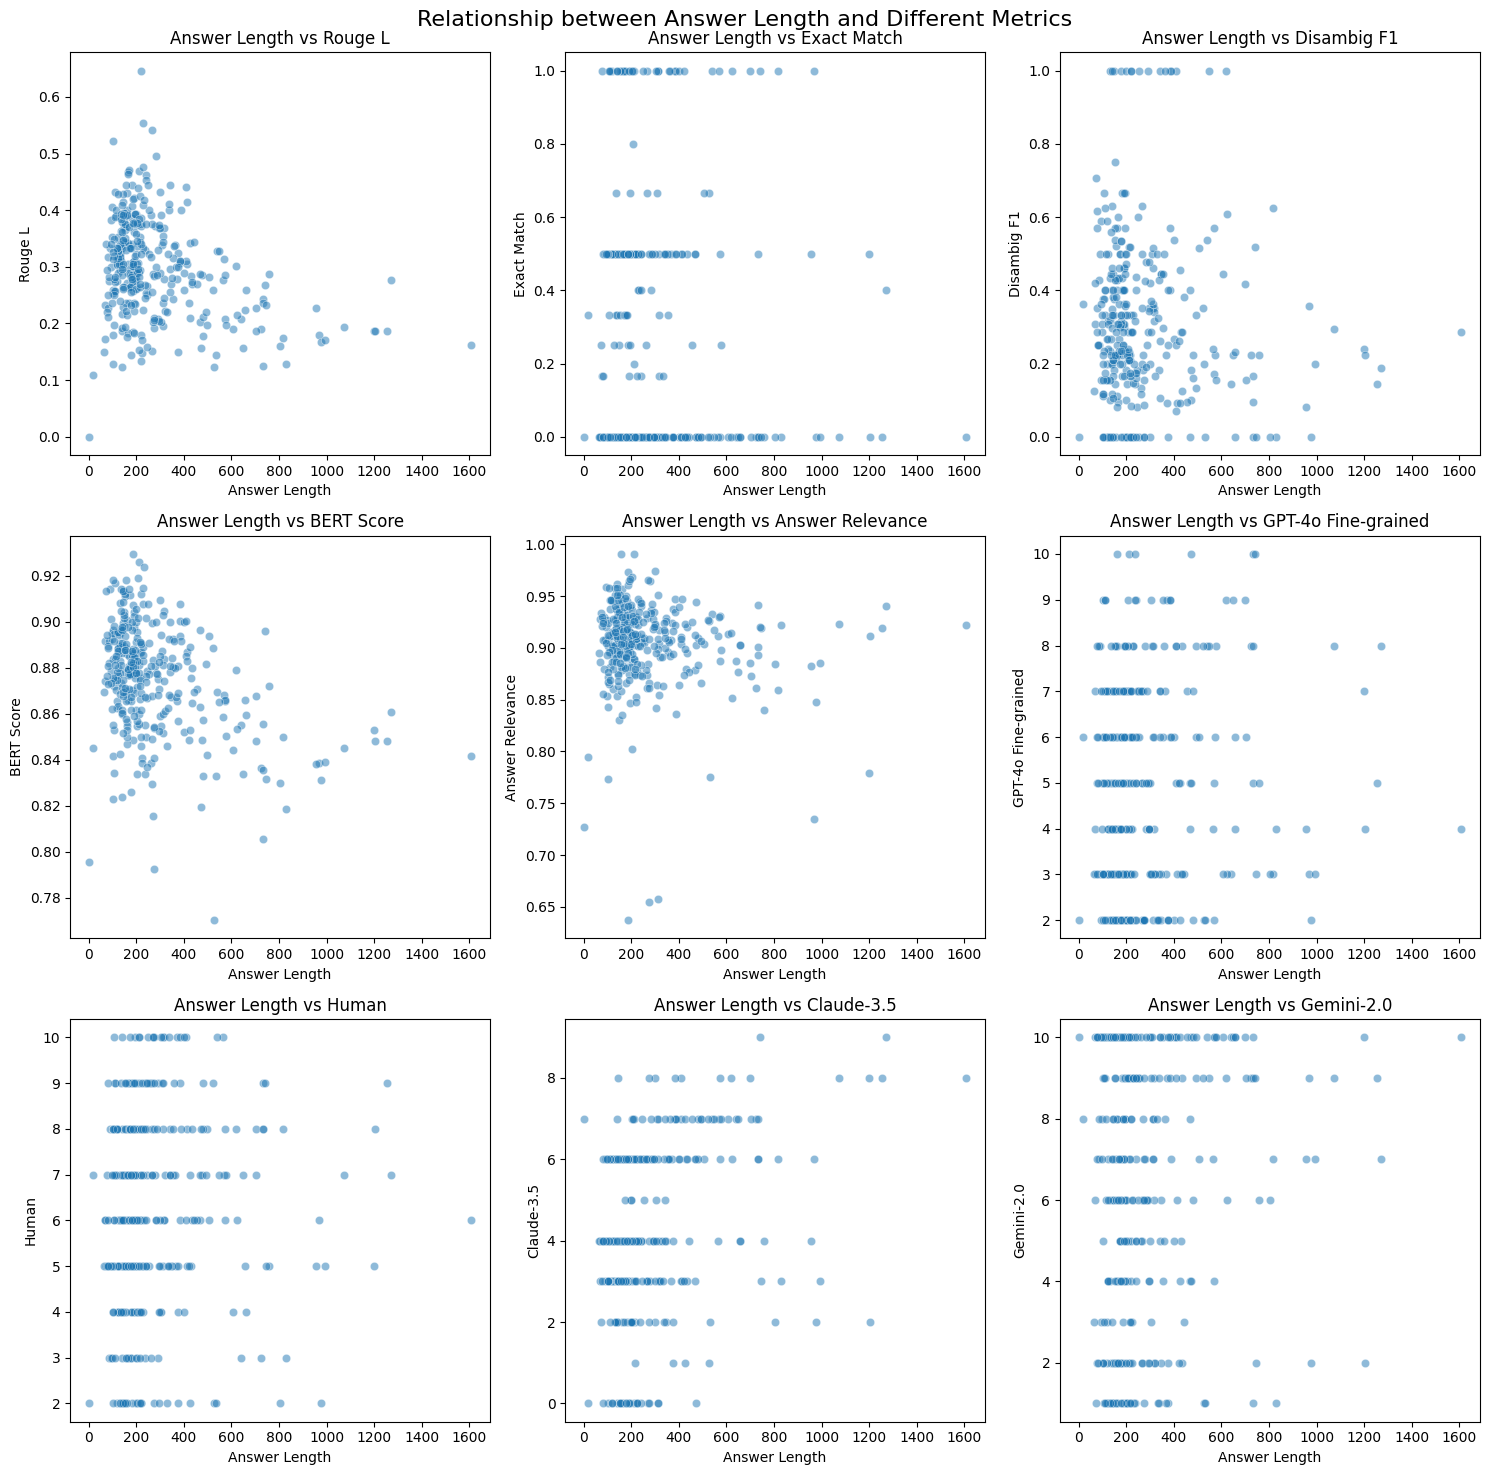

In [46]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Relationship between Answer Length and Different Metrics', fontsize=16)

# List of metrics to plot
metrics = ['Rouge L', 'Exact Match', 'Disambig F1', 'BERT Score', 
          'Answer Relevance', 'GPT-4o Fine-grained', 'Human', 'Claude-3.5', 'Gemini-2.0']

# Create scatter plots
for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    
    sns.scatterplot(data=df, x='answer_length', y=metric, ax=axes[row, col], alpha=0.5)
    axes[row, col].set_title(f'Answer Length vs {metric}')
    axes[row, col].set_xlabel('Answer Length')
    axes[row, col].set_ylabel(metric)

plt.tight_layout()
plt.show()

## length

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
def draw_length_boxplot(df, dataset, rows=2,cols=5,metrics=['Human', 'Rouge L', 'BERT Score', 'Exact Match', 'Disambig F1',  
              'Answer Relevance', 'GPT-4o Fine-grained', 'GPT-4o', 'Claude-3.5', 'Gemini-2.0']):
    # Set up the figure with multiple subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
    # fig.suptitle(f'Relationship between Answer Length and Different Metrics on {dataset}', fontsize=16)

    # Create box plots
    for idx, metric in enumerate(metrics):
        row = idx // cols
        col = idx % cols
        df['length_group'] = pd.qcut(df['answer_length'], q=5)
        df['length_group'] = df['length_group'].cat.as_ordered()
        df = df.sort_values(by='length_group')

        sns.boxplot(data=df, x='length_group', y=metric, ax=axes[row, col], width=0.5)
        axes[row, col].set_xlabel('')
        axes[row, col].tick_params(axis='x', rotation=45)
        axes[row, col].set_ylabel(metric)
    # Remove empty subplots
    for idx in range(len(metrics), rows * cols):
        fig.delaxes(axes.flatten()[idx])
    plt.tight_layout()
    plt.show()


In [35]:
print(df_asqa['length_group'].value_counts())
print(df_wikieval['length_group'].value_counts())
print(df_antique['length_group'].value_counts())

length_group
(1.999, 137.4]     69
(179.8, 226.2]     69
(374.8, 1607.0]    69
(137.4, 179.8]     68
(226.2, 374.8]     68
Name: count, dtype: int64
length_group
(0.999, 28.0]     71
(28.0, 47.0]      70
(47.0, 79.0]      70
(132.4, 641.0]    70
(79.0, 132.4]     69
Name: count, dtype: int64
length_group
(-0.001, 23.0]    293
(115.0, 438.0]    277
(66.0, 115.0]     274
(23.0, 43.0]      273
(43.0, 66.0]      269
Name: count, dtype: int64


In [67]:
df_asqa.describe()

,answer_length,long_answer_length,short_answer_length,response_length,response_with_ref_score,Rouge L,Exact Match,Disambig F1,BERT Score,GPT-4o Accuracy,GPT-4o Informativeness,Answer Relevance,Human Accuracy,Human Informativeness,GPT-4o Fine-grained,Human,Claude-3.5,Gemini-2.0,GPT-4o
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,276.723032,288.591837,3.428571,817.402332,4.043732,0.298846,0.269193,0.309802,0.874919,2.440233,2.370262,0.903689,3.209913,2.886297,4.810496,6.096210,4.306122,6.239067,4.705539
std,221.291390,126.535399,1.416280,273.307201,2.127750,0.086283,0.335335,0.227979,0.023524,1.402301,0.958155,0.042011,1.423370,1.116811,2.244345,2.208321,2.097658,3.351004,2.362759
min,2.000000,121.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.770249,1.000000,1.000000,0.637306,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000
25%,145.000000,219.000000,2.000000,651.500000,2.000000,0.238182,0.000000,0.166667,0.861227,1.000000,2.000000,0.887042,2.000000,2.000000,3.000000,5.000000,3.000000,3.000000,3.000000
50%,200.000000,275.000000,3.000000,753.000000,3.000000,0.299065,0.000000,0.285714,0.878216,2.000000,2.000000,0.909000,3.000000,3.000000,5.000000,6.000000,4.000000,7.000000,4.000000
75%,318.000000,331.000000,4.000000,903.500000,5.000000,0.352941,0.500000,0.426407,0.890494,4.000000,3.000000,0.926799,4.000000,4.000000,7.000000,8.000000,6.000000,10.000000,7.000000
max,1607.000000,861.000000,6.000000,2050.000000,10.000000,0.646465,1.000000,1.000000,0.929446,5.000000,5.000000,0.990621,5.000000,5.000000,10.000000,10.000000,9.000000,10.000000,10.000000


In [65]:
df_wikieval.describe()

,id,GPT-4o,Claude-3.5,Gemini-2.0,Human Accuracy,Human Informativeness,Human,Rouge L,BERT Score,GPT-4o Fine-grained,answer_length
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,24.500000,7.680000,6.200000,8.868571,4.505714,4.285714,8.791429,0.509061,0.923320,8.662857,88.345714
std,14.451529,1.925667,1.586115,1.707857,0.810901,0.926262,1.649672,0.235207,0.042147,1.786785,84.771447
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.050445,0.772285,2.000000,1.000000
25%,12.000000,7.000000,6.000000,9.000000,4.000000,4.000000,8.000000,0.320087,0.894214,8.000000,32.000000
50%,24.500000,8.000000,6.000000,9.000000,5.000000,5.000000,10.000000,0.445398,0.922579,9.000000,57.000000
75%,37.000000,9.000000,7.000000,10.000000,5.000000,5.000000,10.000000,0.697442,0.957566,10.000000,115.750000
max,49.000000,10.000000,9.000000,10.000000,5.000000,5.000000,10.000000,1.000000,1.000000,10.000000,641.000000


In [64]:
df_antique.describe()

,query_id,doc_id,relevance,Answer Relevance Score,GPT-4 Score,GPT4 Accuracy,GPT4 Informativeness,Human Accuracy,Human Informativeness,Rouge-L,BERT Score,gpt4_cate_accuracy,gpt4_cate_informativeness,GPT-4o Fine-grained,Human,answer_length
count,1.386000e+03,1.386000e+03,1386.0,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,2.313454e+06,4.127399e+07,4.0,0.705167,5.893218,3.810967,3.507937,3.906205,3.373016,0.126856,0.838427,3.705628,3.378066,7.318903,7.279221,79.436508
std,1.343197e+06,7.466088e+07,0.0,0.196053,2.808728,1.383365,1.374448,1.287487,1.359590,0.063934,0.045252,1.429422,1.424361,2.623835,2.494896,78.388318
min,8.293000e+03,8.293100e+04,4.0,-0.017612,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
25%,1.119420e+06,1.199640e+07,4.0,0.598216,3.000000,3.000000,2.000000,3.000000,2.000000,0.084507,0.825827,3.000000,2.000000,6.000000,6.000000,27.000000
50%,2.413036e+06,2.506474e+07,4.0,0.739143,6.000000,4.000000,4.000000,4.000000,3.000000,0.119880,0.840431,4.000000,3.500000,8.000000,8.000000,54.000000
75%,3.411123e+06,3.698636e+07,4.0,0.846524,9.000000,5.000000,5.000000,5.000000,5.000000,0.160000,0.855017,5.000000,5.000000,10.000000,10.000000,93.000000
max,4.473331e+06,4.357460e+08,4.0,1.000000,10.000000,5.000000,5.000000,5.000000,5.000000,0.463918,0.914255,5.000000,5.000000,10.000000,10.000000,438.000000


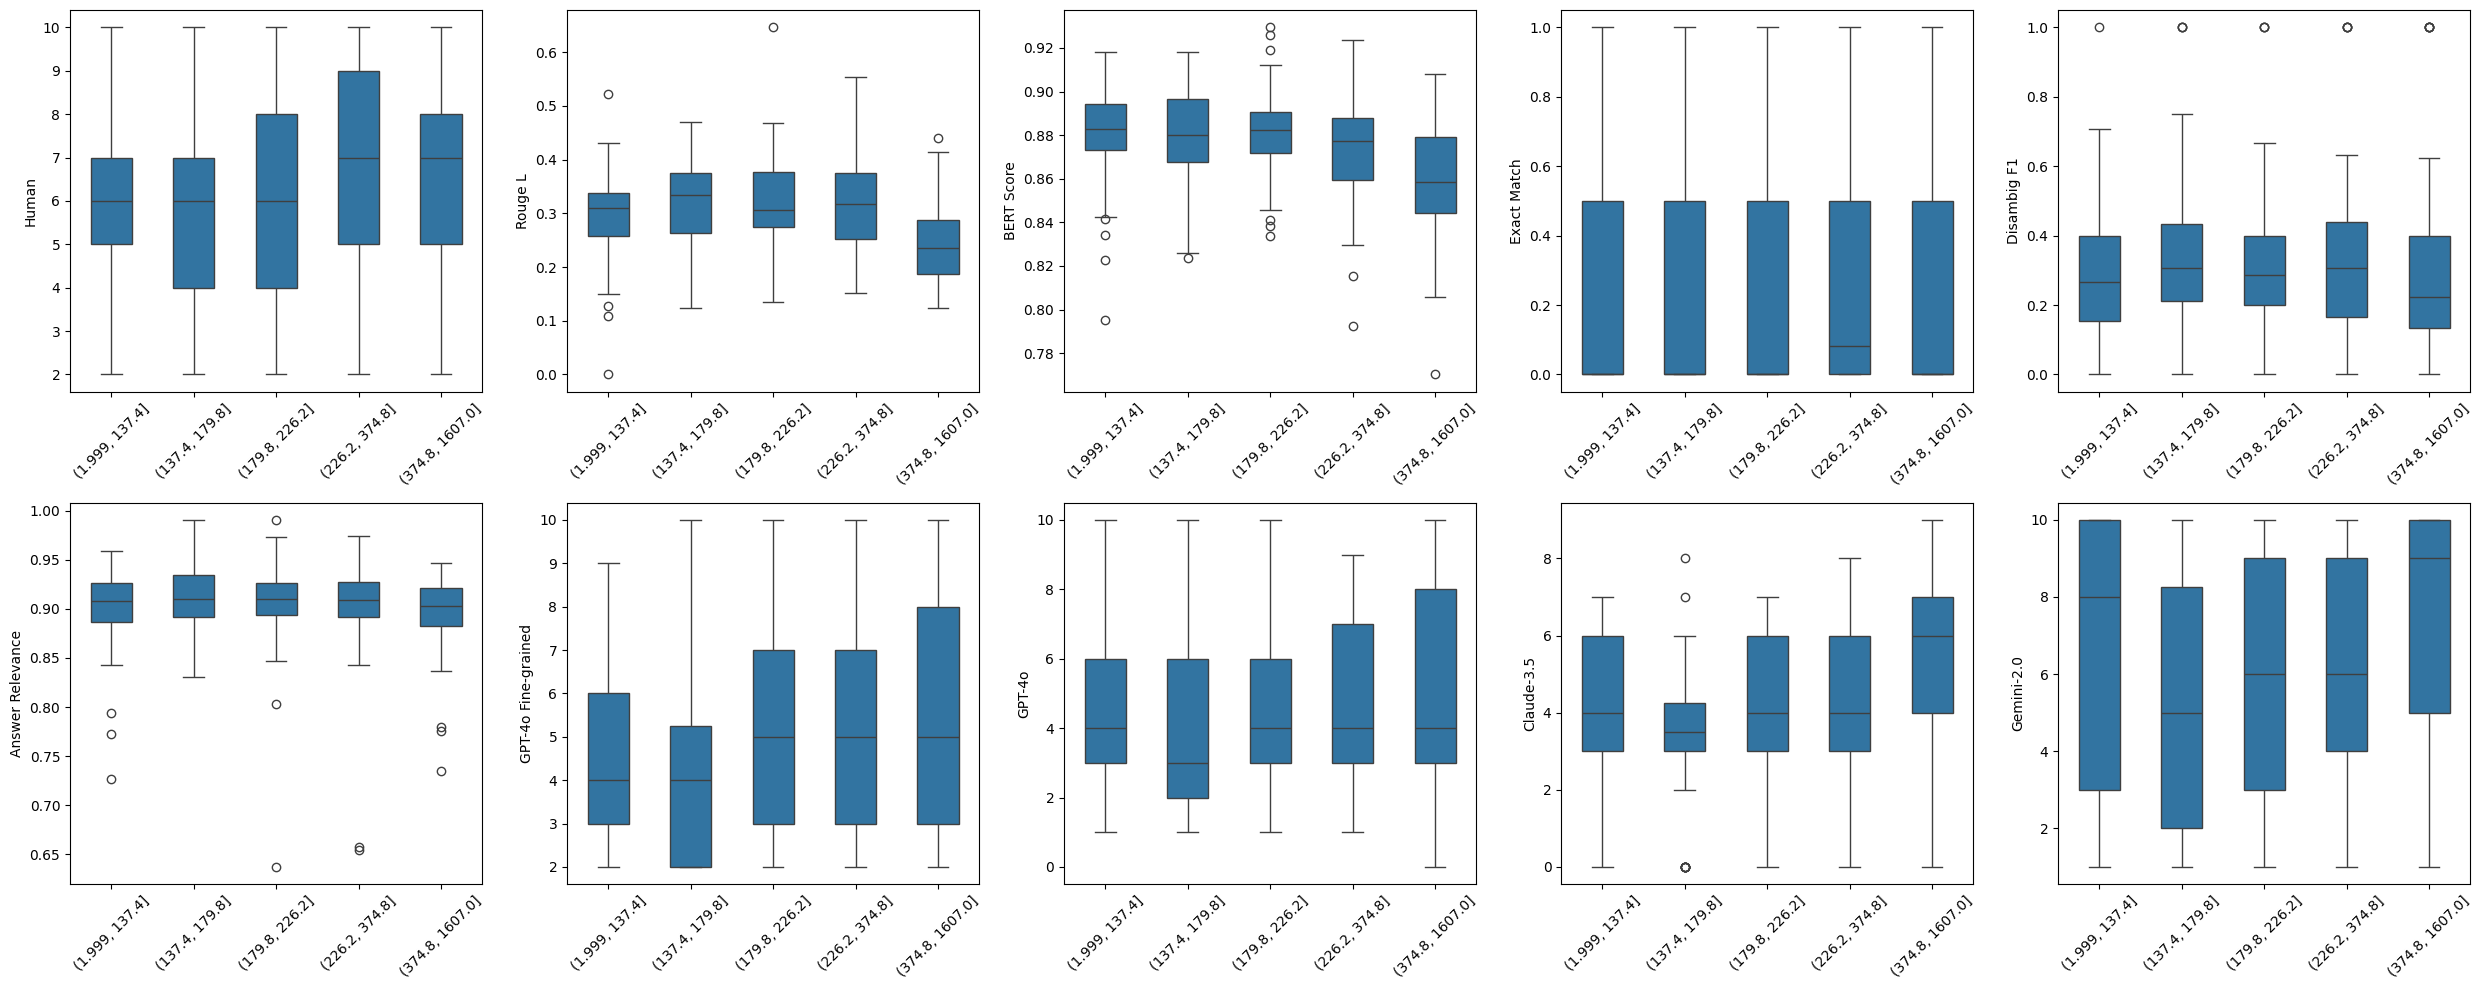

In [59]:
draw_length_boxplot(df_asqa, 'ASQA')

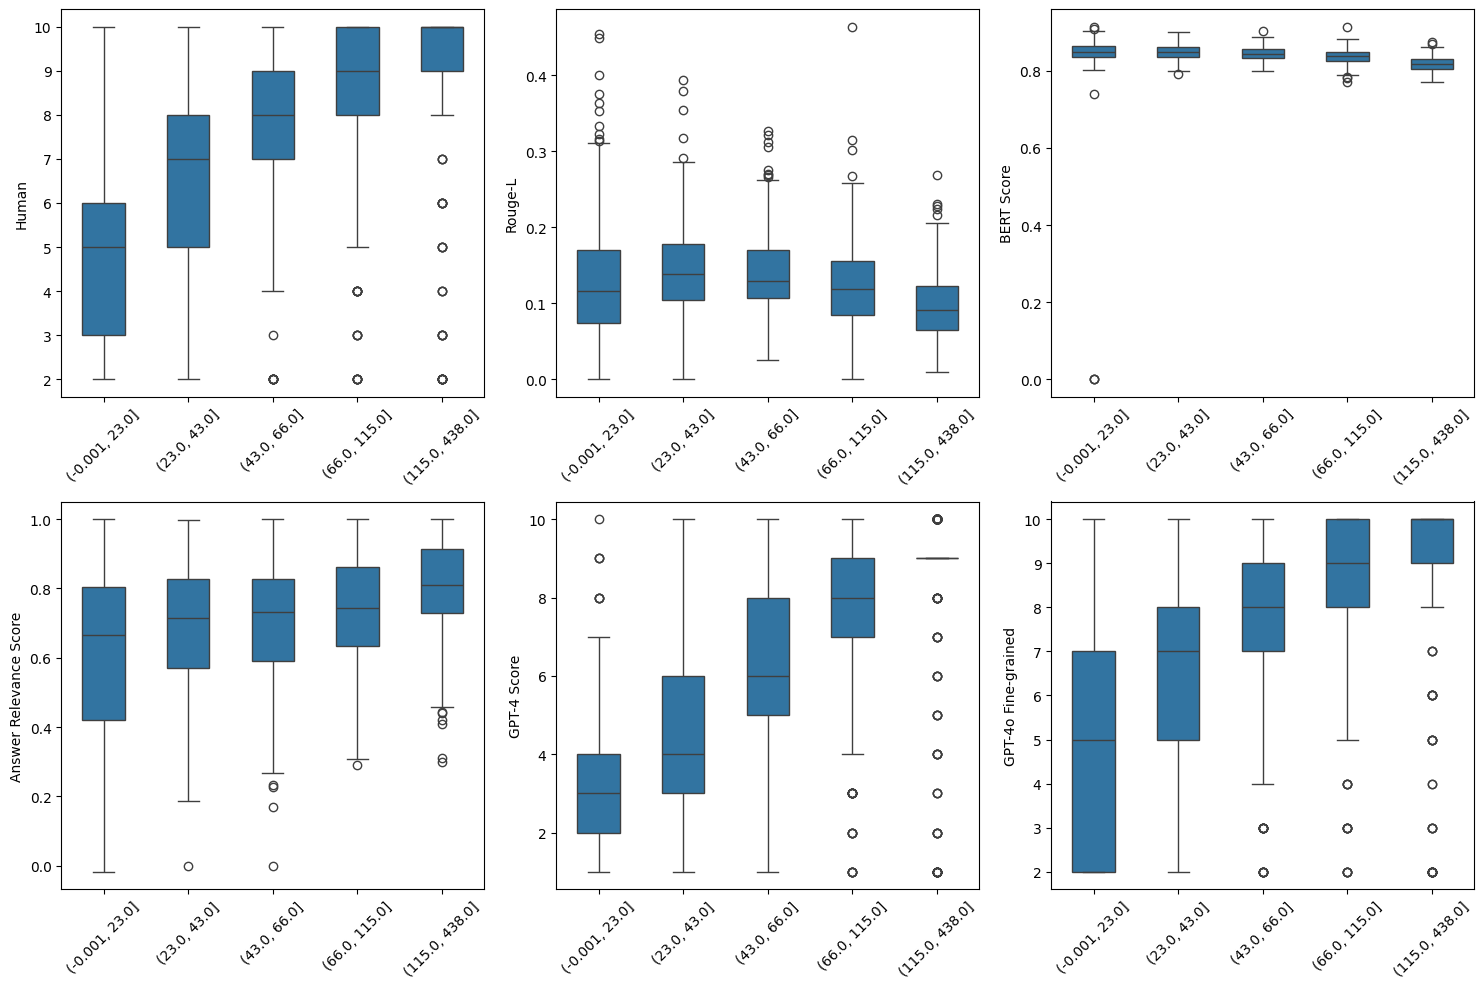

In [47]:
draw_length_boxplot(df_antique, 'ANTIQUE', metrics=['Human', 'Rouge-L', 'BERT Score', 'Answer Relevance Score', 'GPT-4 Score','GPT-4o Fine-grained'])

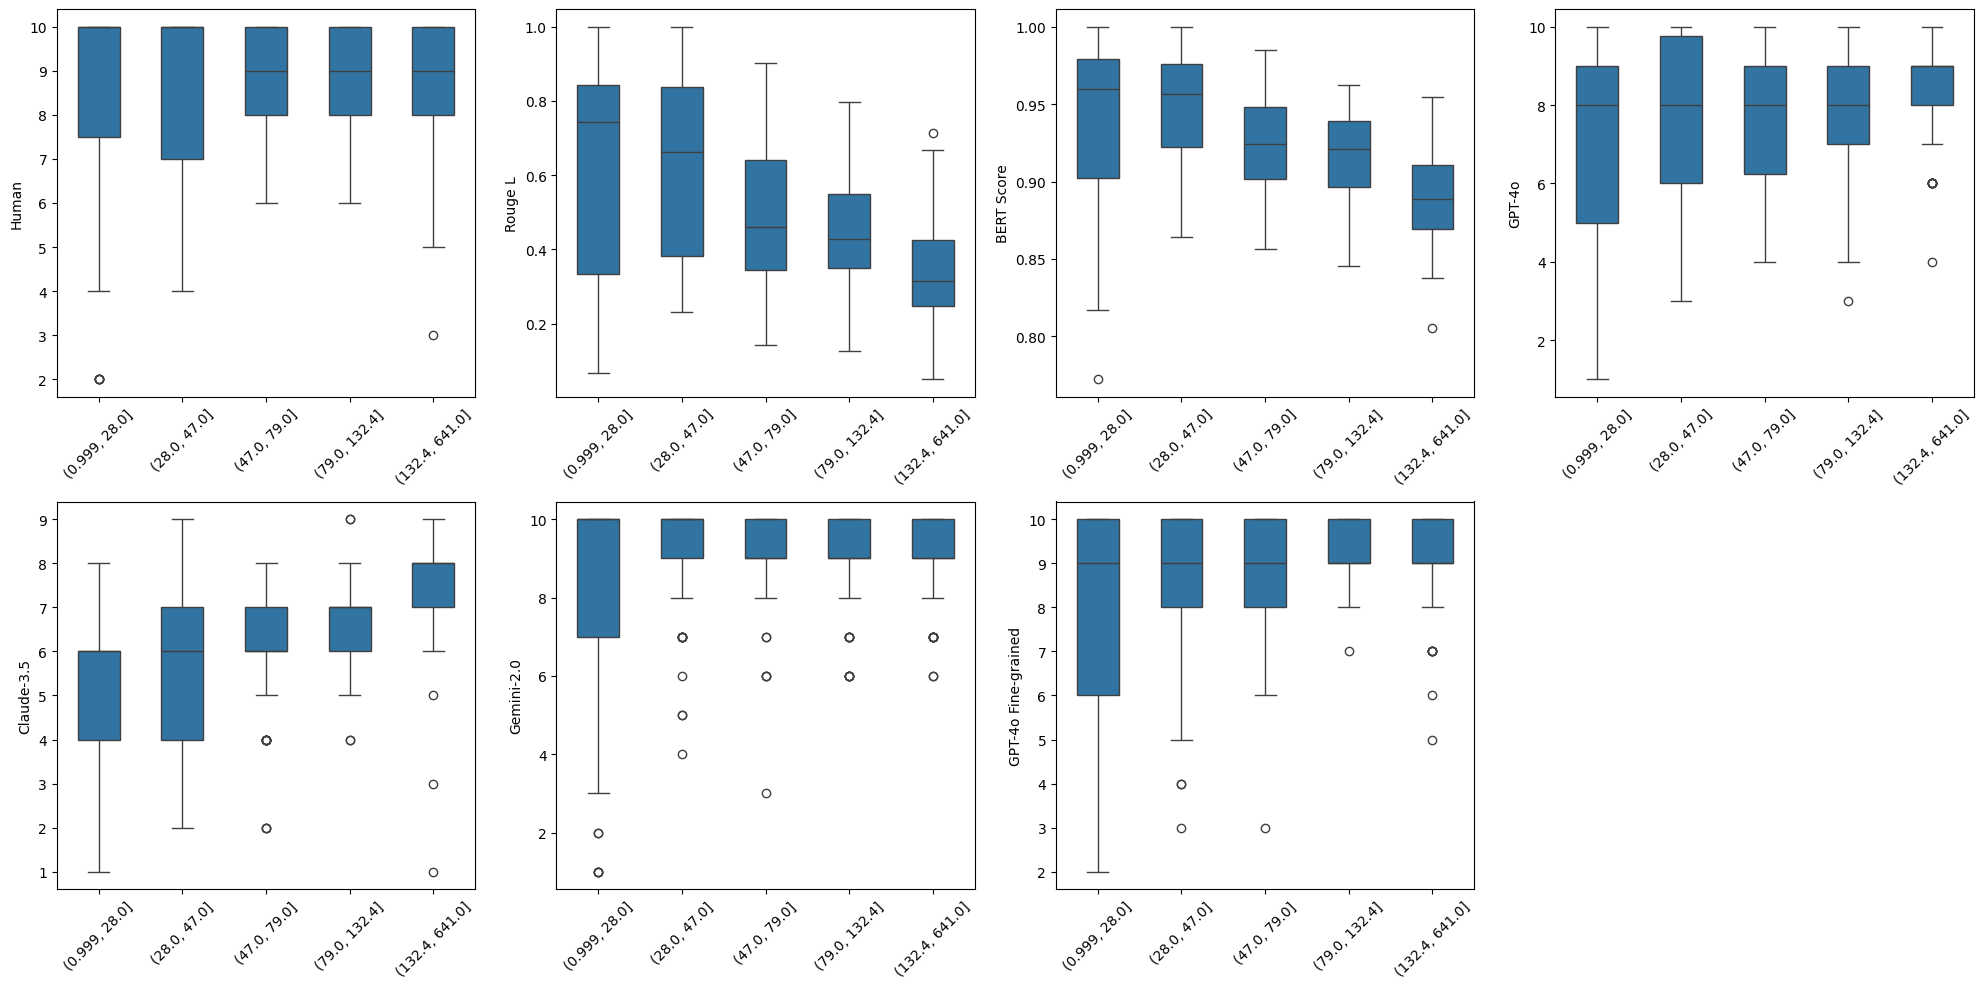

In [58]:
draw_length_boxplot(df_wikieval, 'Wikieval', rows=2, cols=4, metrics=['Human', 'Rouge L', 'BERT Score', 'GPT-4o', 'Claude-3.5', 'Gemini-2.0', 'GPT-4o Fine-grained'])

In [64]:
df['length_group'].unique()

[(0.395, 323.0], (323.0, 644.0], (644.0, 965.0], (965.0, 1286.0], (1286.0, 1607.0]]
Categories (5, interval[float64, right]): [(0.395, 323.0] < (323.0, 644.0] < (644.0, 965.0] < (965.0, 1286.0] < (1286.0, 1607.0]]

In [62]:
def draw_kde_plots(df, metrics=['Human', 'Rouge L', 'BERT Score', 'Answer Relevance', 'GPT-4o Fine-grained', 'GPT-4o', 'Claude-3.5', 'Gemini-2.0']):
    # Set up the figure with multiple subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle('Relationship between Answer Length and Different Metrics', fontsize=16)

    # Create scatter plots
    for idx, metric in enumerate(metrics):
        row = idx // 3
        col = idx % 3

        sns.kdeplot(data=df, x='answer_length', y=metric, ax=axes[row, col], fill=True, cmap='Blues', alpha=0.7)
        axes[row, col].set_title(f'Answer Length vs {metric}')
        axes[row, col].set_xlabel('Answer Length')
        axes[row, col].set_ylabel(metric)

    plt.tight_layout()
    plt.show()

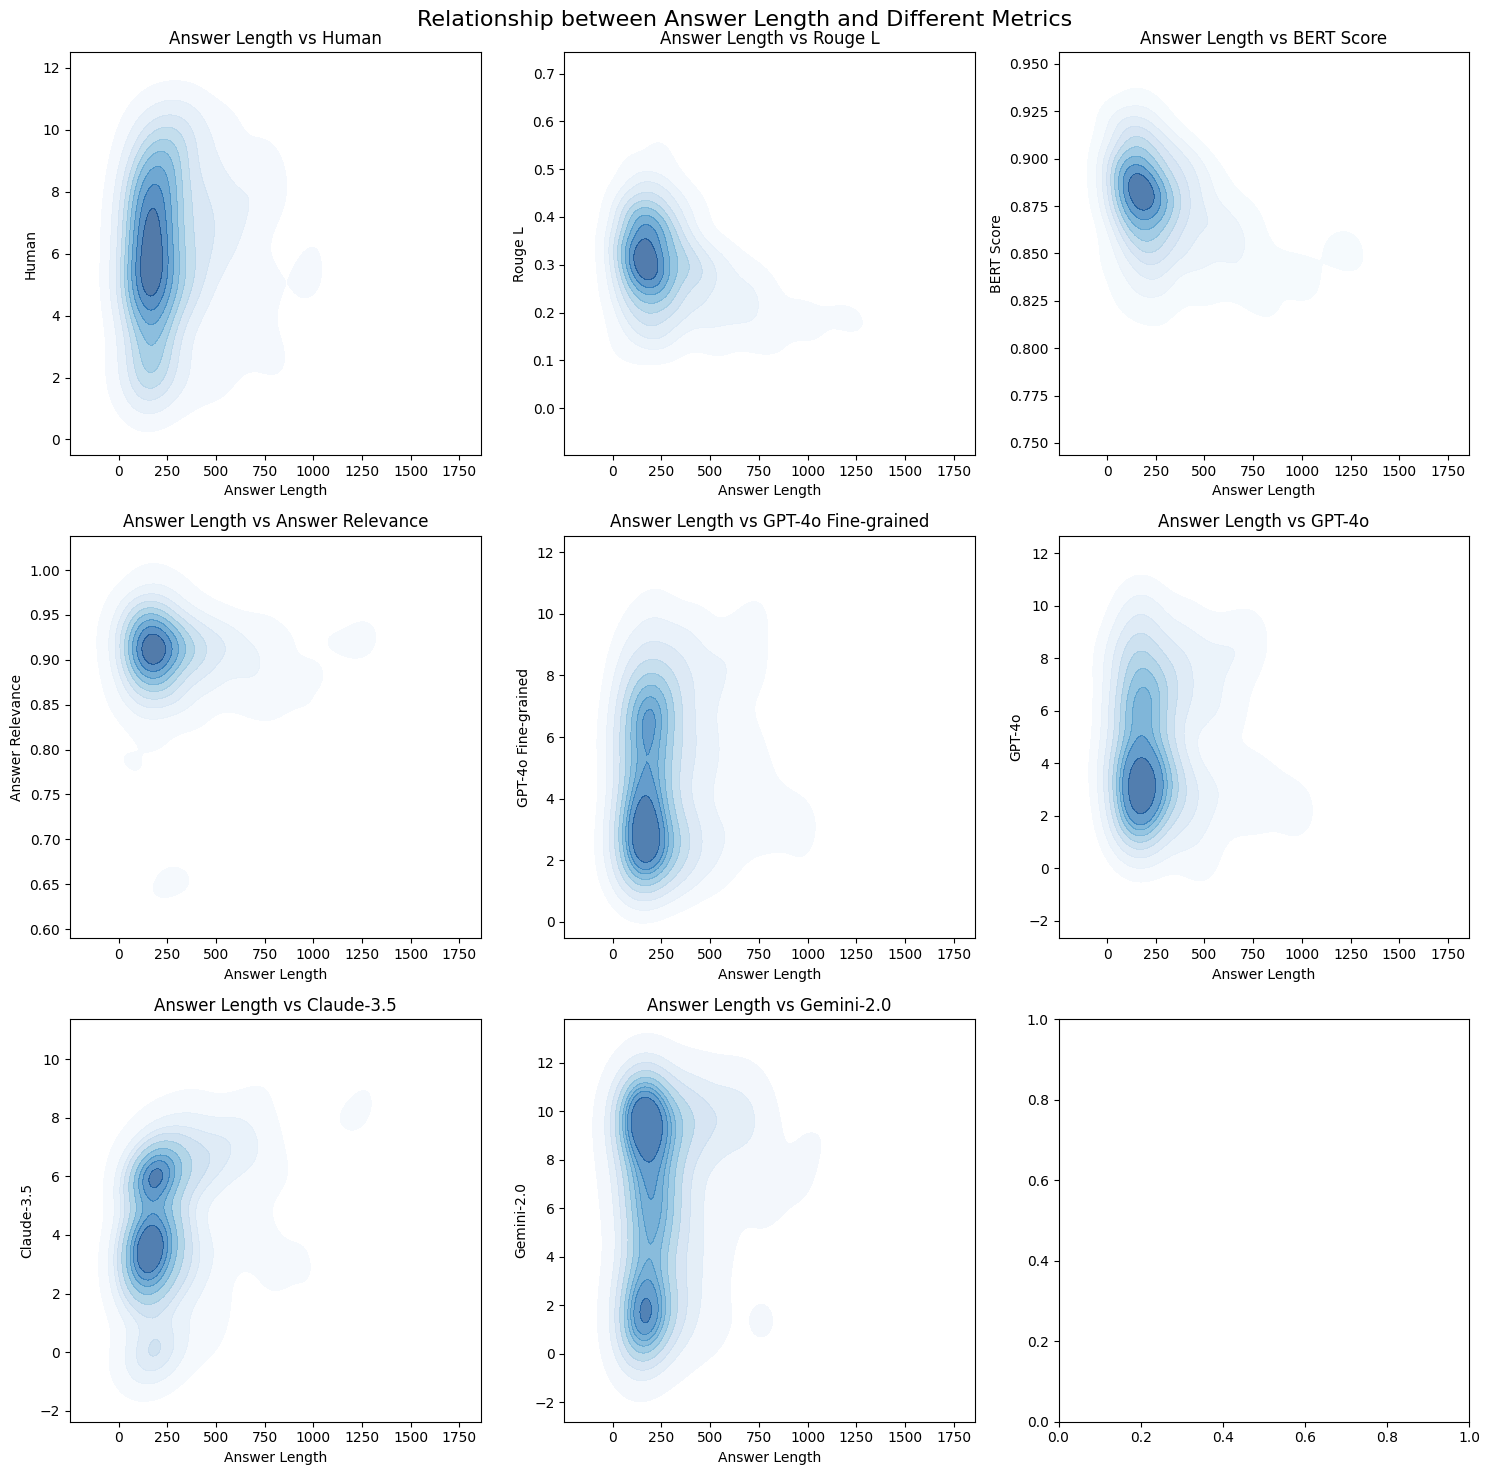

In [63]:
draw_kde_plots(df_asqa)